## 제품 분류 - 한 페이지 당 색상이 2가지 이상 있는 제품들 걸러내기

In [ ]:
import pandas as pd

df = pd.read_csv("musinsa_data.csv")

# 컬러와 관련된 단어, 정규식 패턴을 지정
pattern = r"CO|COL|COLOR|컬러|PACK|\d+종"

# 제품명에 정규식 패턴이 포함된 행을 필터링
rows_to_drop = df[df["제품명"].str.contains(pattern, case=False, na=False)]

# 해당 행을 삭제
df_filtered = df.drop(rows_to_drop.index)
df_filtered

df_filtered.to_csv('data_filtered.csv', index = False, encoding='utf-8')

## 결측치 확인 및 범주 변수 인코딩

In [ ]:
# 브랜드 관련 변수 결측치 확인
print('브랜드별 좋아요 수 결측치 : ', len(df[df['브랜드 좋아요 수'].isnull()]))
print('브랜드별 카테고리 결측치 : ', len(df[df['브랜드_카테고리'].isnull()]))
print('브랜드별 리뷰 평균 개수 결측치 : ', len(df[df['리뷰_평균'].isnull()]))
print('브랜드별 리뷰 top 3 키워드 추출 결측치 : ', len(df[df['word_score'].isnull()]))
print('브랜드별 셔츠 제품 평균 조회수 결측치 : ', len(df[df['총조회수_평균'].isnull()]))
print('브랜드별 셔츠 제품 평균 구매수 결측치 : ', len(df[df['총구매수_평균'].isnull()]))
print('브랜드별 제일 많이 구매하는 성별 결측치 : ', len(df[df['브랜드_구매_성별'].isnull()]))
print('브랜드별 제일 많이 조회하는 성별 결측치 : ', len(df[df['브랜드_조회_성별'].isnull()]))

# 각 제품별 관련 변수 결측치 확인
print('원가 결측치 : ', len(df[df['원가'].isnull()]))
print('할인가 결측치 : ', len(df[df['할인가'].isnull()]))
print('할인율 결측치 : ', len(df[df['할인율'].isnull()]))
print('제품명과 태그 빈출단어 top 3 결측치 : ', len(df[df['제목태그점수'].isnull()]))
print('정확한 rgb값 top 1 결측치 : ', len(df[df['rgb_1'].isnull()]))
print('정확한 rgb값 top 2 결측치 : ', len(df[df['rgb_2'].isnull()]))
print('웹상에서 범주화 되어 있던 제품별 컬러 결측치 : ', len(df[df['컬러'].isnull()]))
print('사이즈 수 결측치 : ', len(df[df['사이즈 수'].isnull()]))
print('메인 샷이 모델 사진인지 t/f 결측치 : ', len(df[df['human_ditect'].isnull()]))
print('스타일샷의 유무 결측치 : ', len(df[df['스타일샷_유무'].isnull()]))

컬러 결측치 :  0


In [ ]:
# 브랜드별 셔츠 제품 평균 조회수는 값이 없는 브랜드가 적어서 데이터 삭제
df['총조회수_평균'].dropna(how='all', inplace=True)

# 사이즈 수 결측치 0으로 처리 -> 메인 화면에 사이즈 수 표시 안되어 있음
df['사이즈 수'].fillna(0, inplace = True)

In [ ]:
# 범주 변수 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['컬러_인코딩'] = label_encoder.fit_transform(df['컬러'])

label_encoder = LabelEncoder()

df['브랜드_카테고리_인코딩'] = label_encoder.fit_transform(df['브랜드_카테고리'])

In [ ]:
# 카테고리 결측치 0으로 처리
df['브랜드_카테고리_인코딩'].fillna(0, inplace = True)

## 데이터 전처리,,,?회귀모형으로 총 판매량 수 모델링 -> 제대로 판별 불가능 -> 분류 모델로 변환

### 시각화로 종속 변수 확인

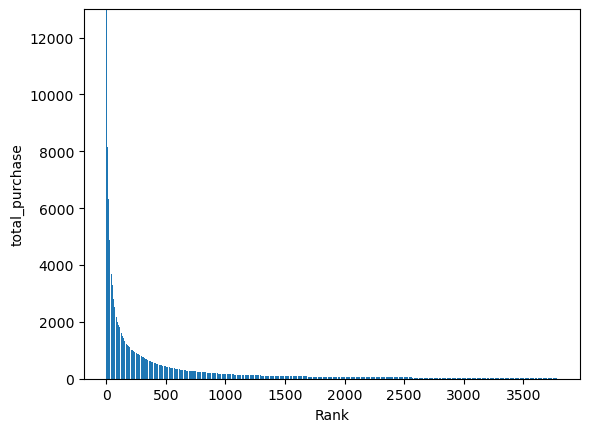

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv("ml_data_total.csv")

plt.bar(df.index,df['총구매수'])
plt.xlabel('Rank')
plt.ylabel('total_purchase')
plt.ylim(0,13000)

plt.show()

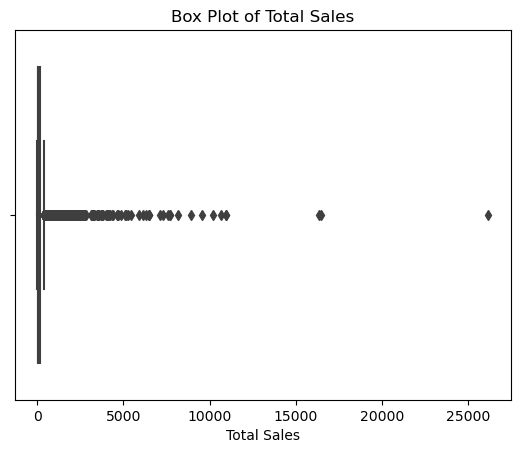

In [ ]:
sns.boxplot(data=df, x='총구매수')
plt.title('Box Plot of Total Sales')
plt.xlabel('Total Sales')
plt.show()

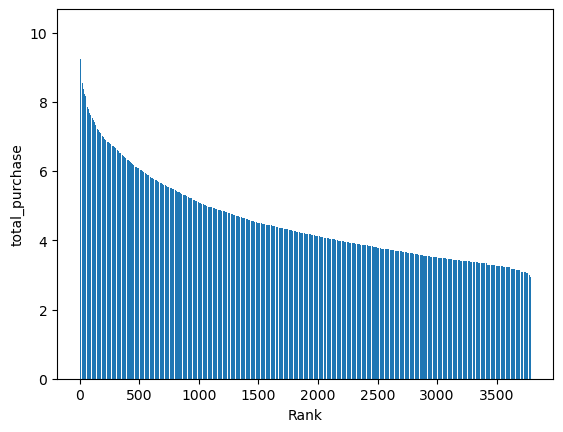

In [ ]:
# 구매수 로그 변환
y_log = np.log(df['총구매수'])
plt.bar(df.index,y_log)
plt.xlabel('Rank')
plt.ylabel('total_purchase')

plt.show()

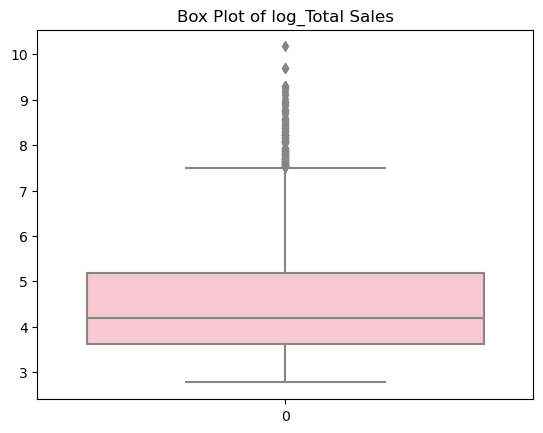

In [ ]:
sns.boxplot(data=y_log,palette=['pink'])
plt.title('Box Plot of log_Total Sales')
plt.show()

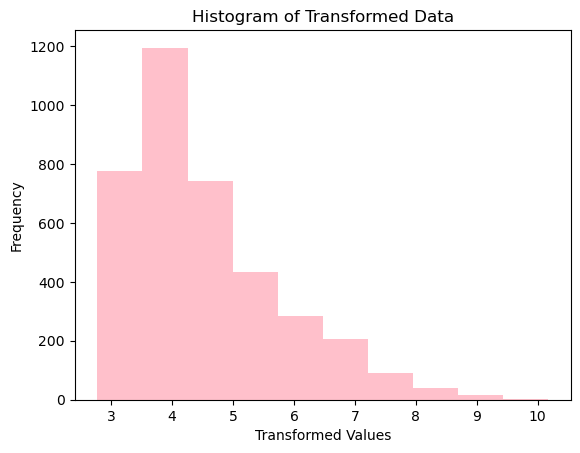

In [ ]:
plt.hist(y_log, bins=10, color = 'pink')
plt.title('Histogram of Transformed Data')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['log_Sales'] = y_log

### 회귀 분석 - 대략적인 성능을 보기 위해 일단 기본값으로 회귀 돌림

#### 회귀 모델 선정

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 로드
y = df["log_Sales"]
X = df.drop(['총구매수','log_Sales'], axis = 1)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [ ]:
### 결정 트리 회귀 ###
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# 모델 초기화 및 훈련
dt_regressor = DecisionTreeRegressor(random_state=1000)
dt_regressor.fit(X_train, y_train)

# 예측
y_pred_train = dt_regressor.predict(X_train)
y_pred_test = dt_regressor.predict(X_test)

# 성능 평가 - R^2
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)

print(adjusted_r2_train)
print(adjusted_r2_test)

1.0
0.3261466935033077


In [ ]:
### RandomForest 회귀 ###
from sklearn.ensemble import RandomForestRegressor

# 모델 초기화 및 훈련
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=1000)
rf_regressor.fit(X_train, y_train)

# 예측
y_pred_train_rf = rf_regressor.predict(X_train)
y_pred_test_rf = rf_regressor.predict(X_test)

# 성능 평가 - R^2
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# Adjusted R-squared
adjusted_r2_train_rf = 1 - (1 - r2_train_rf) * (n - 1) / (n - p - 1)
adjusted_r2_test_rf = 1 - (1 - r2_test_rf) * (n - 1) / (n - p - 1)

print(adjusted_r2_train_rf)
print(adjusted_r2_test_rf)

0.9503913603613615
0.6549304965398204


In [ ]:
# 로그 변환 없이 성능 평가

# 성능 평가 - R^2
r2_train_rf = r2_score(np.exp(y_train), np.exp(y_pred_train_rf))
r2_test_rf = r2_score(np.exp(y_test), np.exp(y_pred_test_rf))

# Adjusted R-squared
adjusted_r2_train_rf = 1 - (1 - r2_train_rf) * (n - 1) / (n - p - 1)
adjusted_r2_test_rf = 1 - (1 - r2_test_rf) * (n - 1) / (n - p - 1)

print(adjusted_r2_train_rf)
print(adjusted_r2_test_rf)

0.7033269938446275
0.2443310740051864


In [ ]:
### Gradient Boosting 회귀 ###
from sklearn.ensemble import GradientBoostingRegressor

# 모델 초기화 및 훈련
gb_regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=1000)
gb_regressor.fit(X_train, y_train)

# 예측
y_pred_train_gb = gb_regressor.predict(X_train)
y_pred_test_gb = gb_regressor.predict(X_test)

# 성능 평가 - R^2
r2_train_gb = r2_score(y_train, y_pred_train_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)

# Adjusted R-squared
adjusted_r2_train_gb = 1 - (1 - r2_train_gb) * (n - 1) / (n - p - 1)
adjusted_r2_test_gb = 1 - (1 - r2_test_gb) * (n - 1) / (n - p - 1)

print(adjusted_r2_train_gb)
print(adjusted_r2_test_gb)

0.9049327832959568
0.6062039431207695


In [ ]:
# 로그 변환 없이 성능 평가

# 성능 평가 - R^2
r2_train_gb = r2_score(np.exp(y_train), np.exp(y_pred_train_gb))
r2_test_gb = r2_score(np.exp(y_test), np.exp(y_pred_test_gb))

# Adjusted R-squared
adjusted_r2_train_gb = 1 - (1 - r2_train_gb) * (n - 1) / (n - p - 1)
adjusted_r2_test_gb = 1 - (1 - r2_test_gb) * (n - 1) / (n - p - 1)

print(adjusted_r2_train_gb)
print(adjusted_r2_test_gb)

0.8052610686357901
0.06594317437950259


In [ ]:
### XGBoost 회귀 ###
import xgboost as xgb

# XGBoost 회귀 모델 초기화 및 훈련
xg_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=1000)
xg_regressor.fit(X_train, y_train)

# 예측
y_pred_train_xg = xg_regressor.predict(X_train)
y_pred_test_xg = xg_regressor.predict(X_test)

# 성능 평가 - R^2
r2_train_xg = r2_score(y_train, y_pred_train_xg)
r2_test_xg = r2_score(y_test, y_pred_test_xg)

# Adjusted R-squared
adjusted_r2_train_xg = 1 - (1 - r2_train_xg) * (n - 1) / (n - p - 1)
adjusted_r2_test_xg = 1 - (1 - r2_test_xg) * (n - 1) / (n - p - 1)

print(adjusted_r2_train_xg)
print(adjusted_r2_test_xg)

0.9811469309124052
0.6067348736371423


In [ ]:
# 로그 변환 없이 성능 평가

# 성능 평가 - R^2
r2_train_xg = r2_score(np.exp(y_train), np.exp(y_pred_train_xg))
r2_test_xg = r2_score(np.exp(y_test), np.exp(y_pred_test_xg))

# Adjusted R-squared
adjusted_r2_train_xg = 1 - (1 - r2_train_xg) * (n - 1) / (n - p - 1)
adjusted_r2_test_xg = 1 - (1 - r2_test_xg) * (n - 1) / (n - p - 1)

print(adjusted_r2_train_xg)
print(adjusted_r2_test_xg)

0.9371090574490772
0.27591057200247193


In [ ]:
### lightGBM 회귀 ###
import lightgbm as lgb

# LightGBM 회귀 모델 초기화 및 훈련
lgb_regressor = lgb.LGBMRegressor(random_state=1000)
lgb_regressor.fit(X_train, y_train)

# 예측
y_pred_train_lgb = lgb_regressor.predict(X_train)
y_pred_test_lgb = lgb_regressor.predict(X_test)

# 성능 평가 - R^2
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)

# Adjusted R-squared
adjusted_r2_train_lgb = 1 - (1 - r2_train_lgb) * (n - 1) / (n - p - 1)
adjusted_r2_test_lgb = 1 - (1 - r2_test_lgb) * (n - 1) / (n - p - 1)

print(adjusted_r2_train_lgb)
print(adjusted_r2_test_lgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2635
[LightGBM] [Info] Number of data points in the train set: 3028, number of used features: 20
[LightGBM] [Info] Start training from score 4.529090
0.8745275363118522
0.6482736387610244


In [ ]:
# 로그 변환 없이 성능 평가

# 성능 평가 - R^2
r2_train_lgb = r2_score(np.exp(y_train), np.exp(y_pred_train_lgb))
r2_test_lgb = r2_score(np.exp(y_test), np.exp(y_pred_test_lgb))

# Adjusted R-squared
adjusted_r2_train_lgb = 1 - (1 - r2_train_lgb) * (n - 1) / (n - p - 1)
adjusted_r2_test_lgb = 1 - (1 - r2_test_lgb) * (n - 1) / (n - p - 1)

print(adjusted_r2_train_lgb)
print(adjusted_r2_test_lgb)

0.5650427189976122
0.301089870115678


In [ ]:
### CatBoost 회귀 ###
from catboost import CatBoostRegressor

# CatBoost 회귀 모델 초기화 및 훈련
cb_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_state=1000)
cb_regressor.fit(X_train, y_train, verbose=100)

# 예측
y_pred_train_cb = cb_regressor.predict(X_train)
y_pred_test_cb = cb_regressor.predict(X_test)

# 성능 평가 - R^2
r2_train_cb = r2_score(y_train, y_pred_train_cb)
r2_test_cb = r2_score(y_test, y_pred_test_cb)

# Adjusted R-squared
adjusted_r2_train_cb = 1 - (1 - r2_train_cb) * (n - 1) / (n - p - 1)
adjusted_r2_test_cb = 1 - (1 - r2_test_cb) * (n - 1) / (n - p - 1)

print(adjusted_r2_train_cb)
print(adjusted_r2_test_cb)

0:	learn: 1.1576337	total: 3.81ms	remaining: 3.81s
100:	learn: 0.6554734	total: 304ms	remaining: 2.71s
200:	learn: 0.5498727	total: 610ms	remaining: 2.43s
300:	learn: 0.4771316	total: 901ms	remaining: 2.09s
400:	learn: 0.4202530	total: 1.3s	remaining: 1.94s
500:	learn: 0.3756761	total: 1.8s	remaining: 1.79s
600:	learn: 0.3391370	total: 2.33s	remaining: 1.55s
700:	learn: 0.3071024	total: 2.77s	remaining: 1.18s
800:	learn: 0.2792545	total: 3.14s	remaining: 779ms
900:	learn: 0.2537156	total: 3.49s	remaining: 384ms
999:	learn: 0.2315046	total: 3.8s	remaining: 0us
0.9625197703582472
0.6276048479028161


In [ ]:
# 로그 변환 없이 성능 평가

# 성능 평가 - R^2
r2_train_cb = r2_score(np.exp(y_train), np.exp(y_pred_train_cb))
r2_test_cb = r2_score(np.exp(y_test), np.exp(y_pred_test_cb))

# Adjusted R-squared
adjusted_r2_train_cb = 1 - (1 - r2_train_cb) * (n - 1) / (n - p - 1)
adjusted_r2_test_cb = 1 - (1 - r2_test_cb) * (n - 1) / (n - p - 1)

print(adjusted_r2_train_cb)
print(adjusted_r2_test_cb)

0.8799736945426573
0.27497208466692924


#### 결정계수가 제일 높은 LightGBM 이용하여 회귀 분석 진행

<Axes: ylabel='Frequency'>

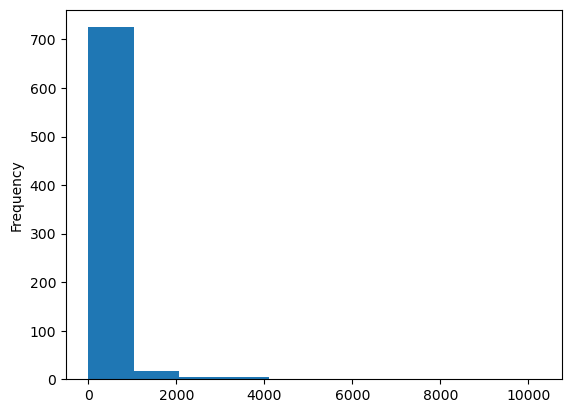

In [ ]:
gap = abs(np.exp(y_test) - np.exp(y_pred_test_lgb))
gap.plot(kind="hist")

<Axes: ylabel='Frequency'>

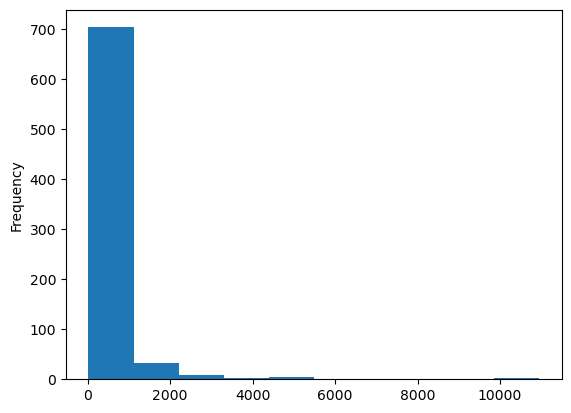

In [ ]:
np.exp(y_test).plot(kind="hist")

In [ ]:
# 기존 데이터들과 예측 데이터 갭 차이가 비슷한 빈도를 보임

In [ ]:
X_test_new = pd.DataFrame()
X_test_new["real_y"] = np.exp(y_test)
X_test_new["pred_y"] = np.exp(y_pred_test_lgb)
X_test_new["Gap"] = gap
X_test_new

,real_y,pred_y,Gap
558,378.0,153.417979,224.582021
969,172.0,91.586850,80.413150
2640,41.0,30.752654,10.247346
248,908.0,844.396973,63.603027
3690,23.0,67.413985,44.413985
...,...,...,...
713,270.0,43.183185,226.816815
1679,79.0,50.635496,28.364504
1091,144.0,84.130426,59.869574
2241,52.0,38.879466,13.120534


In [ ]:
# 결정계수 값이 낮아 예측이 잘 안 될 것으로 예상
# 데이터로 확인해보니, 실제 판매량과 예측 판매량 사이의 갭 차이가 매우 커 회귀는 불가능 할 것으로 보임
# 판매량 데이터를 등급화 하여, 분류 모델로 변경시켜 정확도 높이는게 최선이라 판단

### 판매량 등급화 방법 결정

#### 판매량을 5분위수 나눠서 등급화 해보기

In [ ]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("ml_data_total.csv", encoding = 'utf-8')

# 5분위수로 등급화
df['판매량 등급'] = pd.qcut(df['총구매수'], 5, labels = [1,2,3,4,5])

In [ ]:
print(df[df['판매량 등급'] == 1]['총구매수'].min())
print(df[df['판매량 등급'] == 1]['총구매수'].max())
print(df[df['판매량 등급'] == 2]['총구매수'].min())
print(df[df['판매량 등급'] == 2]['총구매수'].max())
print(df[df['판매량 등급'] == 3]['총구매수'].min())
print(df[df['판매량 등급'] == 3]['총구매수'].max())
print(df[df['판매량 등급'] == 4]['총구매수'].min())
print(df[df['판매량 등급'] == 4]['총구매수'].max())
print(df[df['판매량 등급'] == 5]['총구매수'].min())
print(df[df['판매량 등급'] == 5]['총구매수'].max())

16.0
33.0
34.0
51.0
52.0
90.0
91.0
251.0
252.0
26174.0


In [ ]:
# 총구매수 50~10000 이하인 것들만 추출해서, 5분위수로 등급화
df_div = df[(df['총구매수'] > 50) & (df['총구매수'] < 10000)]

In [ ]:
df_div['판매량 등급'] = pd.qcut(df_div['총구매수'], 5, labels = [1,2,3,4,5])

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22124\3894595788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_div['판매량 등급'] = pd.qcut(df_div['총구매수'], 5, labels = [1,2,3,4,5])


In [ ]:
print(df_div[df_div['판매량 등급'] == 1]['총구매수'].min())
print(df_div[df_div['판매량 등급'] == 1]['총구매수'].max())
print(df_div[df_div['판매량 등급'] == 2]['총구매수'].min())
print(df_div[df_div['판매량 등급'] == 2]['총구매수'].max())
print(df_div[df_div['판매량 등급'] == 3]['총구매수'].min())
print(df_div[df_div['판매량 등급'] == 3]['총구매수'].max())
print(df_div[df_div['판매량 등급'] == 4]['총구매수'].min())
print(df_div[df_div['판매량 등급'] == 4]['총구매수'].max())
print(df_div[df_div['판매량 등급'] == 5]['총구매수'].min())
print(df_div[df_div['판매량 등급'] == 5]['총구매수'].max())

51.0
70.0
71.0
104.0
105.0
189.0
190.0
471.0
472.0
9593.0


#### k-means 군집화 사용을 위한 실루엣 계수 확인

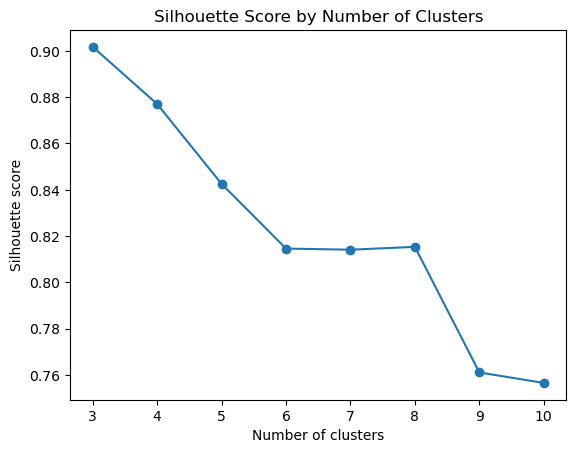

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 군집화에 사용할 컬럼 선택
x_df = df[['총구매수']]

# 군집 수 범위 설정
range_n_clusters = range(3, 11)

# 각 군집 수에 대해 실루엣 계수 계산
silhouette_avg_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1000, n_init = 10)
    cluster_labels = kmeans.fit_predict(x_df)
    silhouette_avg = silhouette_score(x_df, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

# 실루엣 계수 시각화
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score by Number of Clusters')
plt.show()

#### k-means 군집화 적용

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# 데이터 불러오기
df = pd.read_csv("ml_data_total.csv", encoding = 'utf-8')

# 종속 변수인 총 구매수 기준 정렬
df = df.sort_values(by='총구매수', ascending=False)
df = df.reset_index()

# 종속 변수 추출
df_y = sorted(list(df['총구매수']), reverse = True)

In [ ]:
### 클러스터링으로 그룹화 ###

# 종속 변수인 판매량 데이터 예시
sales = np.array(df_y).reshape(-1, 1)

# 클러스터링
kmeans = KMeans(n_clusters=8, random_state=0, n_init = 10).fit(sales)
labels = kmeans.labels_

# 등급 매기기
labels_map = {0 : '8등급', 1 : '4등급', 2 : '6등급', 3 : '1등급', 4 : '2등급', 5 : '5등급', 6 : '7등급', 7 : '3등급' }
sales_grade = pd.Series(labels).map(labels_map)

print(sales_grade[sales_grade == '1등급'])
print(sales_grade[sales_grade == '2등급'])
print(sales_grade[sales_grade == '3등급'])
print(sales_grade[sales_grade == '4등급'])
print(sales_grade[sales_grade == '5등급'])
print(sales_grade[sales_grade == '6등급'])
print(sales_grade[sales_grade == '7등급'])
print(sales_grade[sales_grade == '8등급'])
# 상위 등급 데이터가 너무 부족, 하위 데이터는 너무 과부하 -> 상위, 하위 등급을 인위적으로 나누어서 등급화를 진행하는게 좋을것이라 판단

0    1등급
dtype: object
1    2등급
2    2등급
dtype: object
3    3등급
4    3등급
5    3등급
6    3등급
7    3등급
8    3등급
dtype: object
9     4등급
10    4등급
11    4등급
12    4등급
13    4등급
14    4등급
15    4등급
16    4등급
17    4등급
18    4등급
19    4등급
20    4등급
21    4등급
dtype: object
22    5등급
23    5등급
24    5등급
25    5등급
26    5등급
27    5등급
28    5등급
29    5등급
30    5등급
31    5등급
32    5등급
33    5등급
34    5등급
35    5등급
36    5등급
37    5등급
38    5등급
39    5등급
40    5등급
41    5등급
42    5등급
43    5등급
44    5등급
45    5등급
46    5등급
47    5등급
48    5등급
49    5등급
50    5등급
51    5등급
52    5등급
53    5등급
54    5등급
55    5등급
56    5등급
57    5등급
58    5등급
dtype: object
59     6등급
60     6등급
61     6등급
62     6등급
63     6등급
      ... 
145    6등급
146    6등급
147    6등급
148    6등급
149    6등급
Length: 91, dtype: object
150    7등급
151    7등급
152    7등급
153    7등급
154    7등급
      ... 
495    7등급
496    7등급
497    7등급
498    7등급
499    7등급
Length: 350, dtype: object
500     8등급
501     8등급
502     8등급
503     8등급
504   

In [ ]:
# 50이하와 10000이상 데이터 분할
df_high = df[df['총구매수'] >= 10000]
df_low = df[df['총구매수'] <= 50]
df_div = df[(df['총구매수'] > 50) & (df['총구매수'] < 10000)]

# 데이터 군집화 수행
sales = np.array(df_div['총구매수']).reshape(-1, 1)
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10).fit(sales)
labels = kmeans.labels_

# 군집 라벨을 등급으로 매핑
labels_map = {0: '6등급', 1: '1등급', 2: '3등급', 3: '4등급', 4: '5등급', 5: '2등급'}
sales_grade = pd.Series(labels).map(labels_map)

# 0등급, 7등급 지정
sales_grade_high = pd.Series(['0등급'] * len(df_high), index=df_high.index)
sales_grade_low = pd.Series(['7등급'] * len(df_low), index=df_low.index)

# 등급을 원래 데이터프레임에 추가
df['판매량등급'] = list(pd.concat([sales_grade_high,sales_grade,sales_grade_low]))

In [ ]:
print(len(df[df['판매량등급'] == '0등급']))
print(len(df[df['판매량등급'] == '1등급']))
print(len(df[df['판매량등급'] == '2등급']))
print(len(df[df['판매량등급'] == '3등급']))
print(len(df[df['판매량등급'] == '4등급']))
print(len(df[df['판매량등급'] == '5등급']))
print(len(df[df['판매량등급'] == '6등급']))
print(len(df[df['판매량등급'] == '7등급']))
# 인위적으로 선택해도 상위 등급 데이터가 너무 부족, 하위 데이터는 너무 과부하... 샘플링 진행해야 할듯

7
14
38
70
174
357
1623
1503
